# CMB-S4 All Chile config - Cluster sensitivity

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np, glob, healpy as H, os, sys
from pylab import *

import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.ERROR)

In [3]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'
rcParams['font.family'] = 'serif'

# Read and plot cluster limiting mass thresholds

In [4]:
survey_dic = {
             'lat_wide': ['wide_supplement', r'LAT-Wide'],
             'lat_roman': ['roman_supplement', r'LAT-Roman'], 
             'lat_delensing': ['delensing_sun90bk', r'LAT-Delensing'], 
             }


fd = 'results/cluster/'

expname_pref = 's4_all_chile_config'
survey_arr = ['lat_wide', 'lat_delensing', 'lat_roman']
patch_arr = [1, 2, 3, 4]



In [45]:
cluster_lim_mass_dic = {}
for survey in survey_arr:
    cluster_lim_mass_dic[survey] = {}
    for patch in patch_arr:
        curr_survey_plus_patch_name = '%s_%s---patch%s' %(expname_pref, survey, patch)
        curr_fname = '%s/snr_from_lnlikes_%s_baseline-diffbgskies_with_limiting_masses.npy' %(fd, curr_survey_plus_patch_name)
        #print( curr_fname )
        curr_dic = np.load( curr_fname, allow_pickle=True ).item()
        curr_lim_mass_dic = curr_dic['limiting_mass_dic']['dust_ksz_rg_tsz'][6]
        zarr, lim_mass_arr, lim_mass_err_arr  = [], [], []
        for zval in curr_lim_mass_dic:
            zarr.append( zval )
            lim_mass_arr.append( curr_lim_mass_dic[zval][0] )
            lim_mass_err_arr.append( curr_lim_mass_dic[zval][1] )
            
        cluster_lim_mass_dic[survey][patch] = [np.asarray(zarr), np.asarray(lim_mass_arr), np.asarray(lim_mass_err_arr)]
        
print(cluster_lim_mass_dic.keys())


dict_keys(['lat_wide', 'lat_delensing', 'lat_roman'])


In [47]:
#also store the old S4 PBDR config
cluster_lim_mass_dic_pbdr = {}
curr_fname = '%s/snr_from_lnlikes_S4sixbands_baseline-diffbgskies_500sims_with_limiting_masses.npy' %(fd)
curr_dic = np.load( curr_fname, allow_pickle=True ).item()
curr_lim_mass_dic = curr_dic['limiting_mass_dic']['dust_ksz_rg_tsz'][6]
zarr, lim_mass_arr, lim_mass_err_arr = [], [], []
for zval in curr_lim_mass_dic:
    zarr.append( zval )
    lim_mass_arr.append( curr_lim_mass_dic[zval][0] )
    lim_mass_err_arr.append( curr_lim_mass_dic[zval][1] )

cluster_lim_mass_dic_pbdr['S4-Wide'] = [np.asarray(zarr), np.asarray(lim_mass_arr), np.asarray(lim_mass_err_arr)]


In [51]:
reqd_z = 1.5
for survey in cluster_lim_mass_dic:
    for patch in patch_arr:
        zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic[survey][patch]
        reqd_z_ind = np.where( zarr == reqd_z )[0][0]     
        print( 'Survey = %s; Patch = %s; Limiting mass = %.3f +/- %.3f at z = %s' %(survey, patch, lim_mass_arr[reqd_z_ind], lim_mass_err_arr[reqd_z_ind], reqd_z))
        

Survey = lat_wide; Patch = 1; Limiting mass = 0.501 +/- 0.056 at z = 1.5
Survey = lat_wide; Patch = 2; Limiting mass = 0.501 +/- 0.053 at z = 1.5
Survey = lat_wide; Patch = 3; Limiting mass = 0.871 +/- 0.119 at z = 1.5
Survey = lat_wide; Patch = 4; Limiting mass = 3.802 +/- 0.171 at z = 1.5
Survey = lat_delensing; Patch = 1; Limiting mass = 0.316 +/- 0.035 at z = 1.5
Survey = lat_delensing; Patch = 2; Limiting mass = 0.437 +/- 0.043 at z = 1.5
Survey = lat_delensing; Patch = 3; Limiting mass = 0.603 +/- 0.069 at z = 1.5
Survey = lat_delensing; Patch = 4; Limiting mass = 2.692 +/- 0.676 at z = 1.5
Survey = lat_roman; Patch = 1; Limiting mass = 0.380 +/- 0.042 at z = 1.5
Survey = lat_roman; Patch = 2; Limiting mass = 0.437 +/- 0.045 at z = 1.5
Survey = lat_roman; Patch = 3; Limiting mass = 0.617 +/- 0.066 at z = 1.5
Survey = lat_roman; Patch = 4; Limiting mass = 2.239 +/- 0.407 at z = 1.5


# Patches 1 and 2 on a single plot for all the surveys

In [52]:
fill_between??

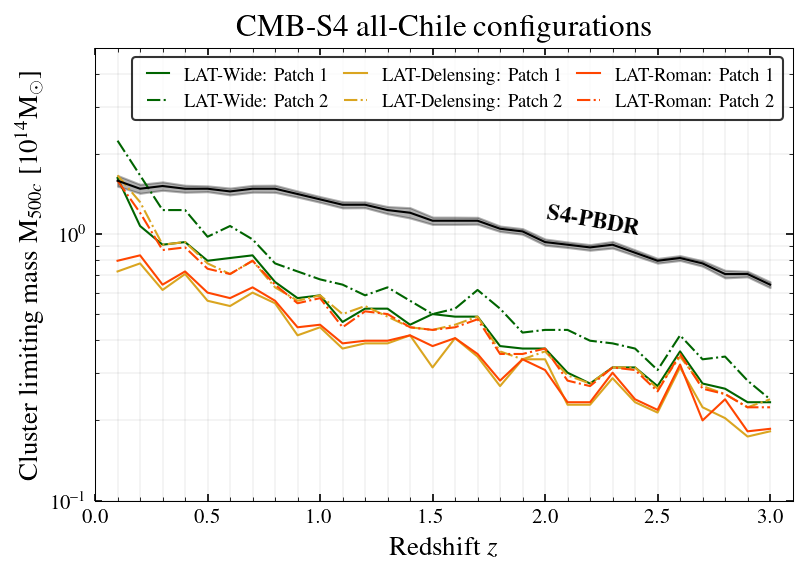

SystemExit: 

In [55]:
clf()
fsval = 13
xmin, xmax = 0., 3.1
ymin, ymax = 0.1, 5.
ax = subplot(111, yscale = 'log')
color_dic = {'lat_wide': 'darkgreen', 'lat_delensing': 'goldenrod', 'lat_roman': 'orangered'}
ls_dic = {1: '-', 2: '-.'}
for cntr, survey in enumerate( survey_arr ):
    surveyval, surveylabval = survey_dic[survey]    
    for patch in [1, 2]:
        zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic[survey][patch]
        plot(zarr, lim_mass_arr, color = color_dic[survey], ls = ls_dic[patch], label = r'%s: Patch %s' %(surveylabval, patch))
        #fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, color = color_dic[survey], alpha = 0.3)


#now add PBDR
zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic_pbdr['S4-Wide']
plot(zarr, lim_mass_arr, color = 'black', ls = '-')
fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, color = 'black', alpha = 0.3)
xloc, yloc = 2, 1.
text( xloc, yloc, r'{\bf S4-PBDR}', fontsize = fsval-2, rotation = -10)
        
ylim( ymin, ymax )
xlim( xmin, xmax )
legend(loc = 1, fontsize = fsval-4, ncol = 3, columnspacing = 0.5, handletextpad = 0.5, handlelength = 1.8)
ylabel(r'Cluster limiting mass M$_{500c}$ [$10^{14}$M$_{\odot}$]', fontsize = fsval)
xlabel(r'Redshift $z$', fontsize = fsval )
title(r'CMB-S4 all-Chile configurations', fontsize = fsval + 2)
grid(True, which = 'both', axis = 'both', lw = 0.2, alpha = 0.2)
        
plname = 'plots/cluster_lim_mass_vs_z_patches_1_and_2_single_panel.png'
savefig(plname, dpi = 200.)
show(); sys.exit()
    

# Patches 1 and 2 on a three panel plot for all the surveys

<Figure size 900x600 with 0 Axes>

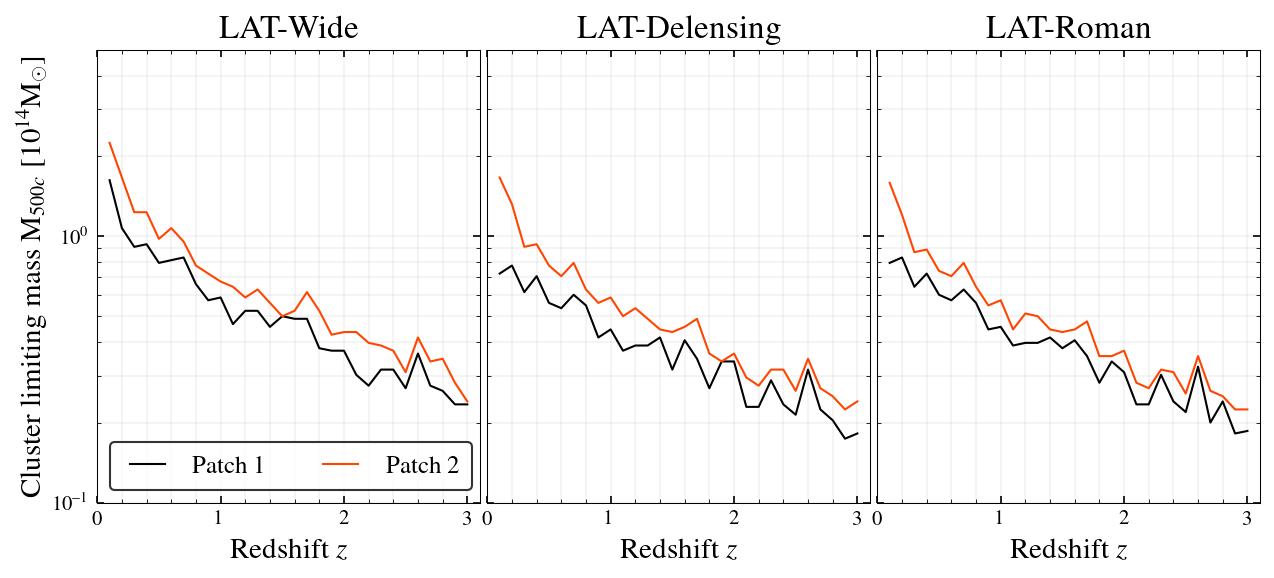

SystemExit: 

In [25]:
clf()
fsval = 14
xmin, xmax = 0., 3.1
ymin, ymax = 0.1, 5.
tr, tc = 1, len( cluster_lim_mass_dic )
figure(figsize = (10., 4.))
subplots_adjust(wspace = 0.02)
sbpl = 1
for cntr, survey in enumerate( survey_arr ):
    surveyval, surveylabval = survey_dic[survey]
    ax = subplot( tr, tc, sbpl, yscale = 'log')
    color_arr = ['black', 'orangered']
    for patch in [1, 2]:
        zarr, lim_mass_arr = cluster_lim_mass_dic[survey][patch]
        plot(zarr, lim_mass_arr, color = color_arr[patch-1], label = r'Patch %s' %(patch))
    ylim( ymin, ymax )
    xlim( xmin, xmax )
    sbpl += 1
    if cntr == 0:
        legend(loc = 3, fontsize = fsval-2, ncol = 2)
        ylabel(r'Cluster limiting mass M$_{500c}$ [$10^{14}$M$_{\odot}$]', fontsize = fsval)
    else:
        setp(ax.get_yticklabels(), visible=False)
    xlabel(r'Redshift $z$', fontsize = fsval )
    title(r'%s' %(surveylabval), fontsize = fsval + 2)
    grid(True, which = 'both', axis = 'both', lw = 0.2, alpha = 0.2)
        
plname = 'plots/cluster_lim_mass_vs_z_patches_1_and_2.png'
savefig(plname, dpi = 200.)
show(); sys.exit()
        
        
    

# All the patches on a three plot for all the surveys

<Figure size 900x600 with 0 Axes>

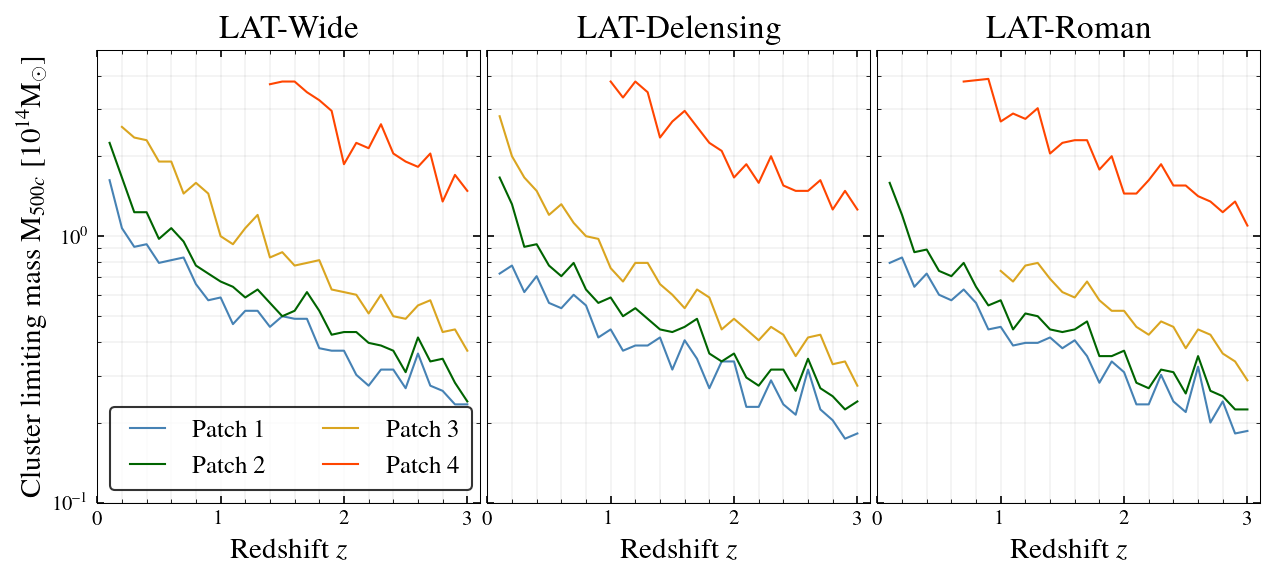

SystemExit: 

In [27]:
clf()
fsval = 14
xmin, xmax = 0., 3.1
ymin, ymax = 0.1, 5.
tr, tc = 1, len( cluster_lim_mass_dic )
figure(figsize = (10., 4.))
subplots_adjust(wspace = 0.02)
sbpl = 1
for cntr, survey in enumerate( survey_arr ):
    surveyval, surveylabval = survey_dic[survey]
    ax = subplot( tr, tc, sbpl, yscale = 'log')
    color_arr = ['steelblue', 'darkgreen', 'goldenrod', 'orangered']
    for patch in patch_arr:
        zarr, lim_mass_arr = cluster_lim_mass_dic[survey][patch]
        plot(zarr, lim_mass_arr, color = color_arr[patch-1], label = r'Patch %s' %(patch))
    ylim( ymin, ymax )
    xlim( xmin, xmax )
    sbpl += 1
    if cntr == 0:
        legend(loc = 3, fontsize = fsval-2, ncol = 2)
        ylabel(r'Cluster limiting mass M$_{500c}$ [$10^{14}$M$_{\odot}$]', fontsize = fsval)
    else:
        setp(ax.get_yticklabels(), visible=False)
    xlabel(r'Redshift $z$', fontsize = fsval )
    title(r'%s' %(surveylabval), fontsize = fsval + 2)
    grid(True, which = 'both', axis = 'both', lw = 0.2, alpha = 0.2)
        
plname = 'plots/cluster_lim_mass_vs_z_all_patches.png'
savefig(plname, dpi = 200.)
show(); sys.exit()
        
        
    